
#<h1 align='center'>King County, Washington housing transactions.</h1>


**id**: A unique identifier for each record in the dataset.\
**date**: The date when the data was recorded.\
**bedrooms**: The number of bedrooms in the house.\
**bathrooms**: The number of bathrooms in the house.\
**sqft_living**: The total living area in square feet.\
**sqft_lot**: The total lot area in square feet.\
**floors**: The number of floors in the house.\
**waterfront**: Whether the house has a waterfront view (binary: 0 or 1).\
**view**: An index indicating the level of view the house has.\
**condition**: The overall condition of the house.\
**grade**: A grading system for the overall construction and design of the house.\
**sqft_above**: The square footage of the house above ground level.\
**sqft_basement**: The square footage of the house's basement.\
**yr_built**: The year the house was built.\
**yr_renovated**: The year the house was last renovated. If never renovated, this might be missing or set to 0.\
**zipcode**: The zipcode area where the house is located.\
**lat**: The latitude coordinate of the house's location.\
**long**: The longitude coordinate of the house's location.\
**sqft_living15**: The square footage of interior living space for the nearest 15 neighbors.\
**sqft_lot15**: The square footage of the land lots of the nearest 15 neighbors.\
**year**: The year component extracted from the 'date' column.\
**day_of_year**: The day of the year component extracted from the 'date' column.\
**month**: The month component extracted from the 'date' column.\
**price**: The price of the house.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
plt.style.use('ggplot')
pd.set_option('Display.max_columns', None)

In [2]:
df = pd.read_csv('kc_house_data.csv')
print('*' *50)
print('shape of the DataFrame', df.shape )
print('*'*50)
df.head()

**************************************************
shape of the DataFrame (21613, 21)
**************************************************


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


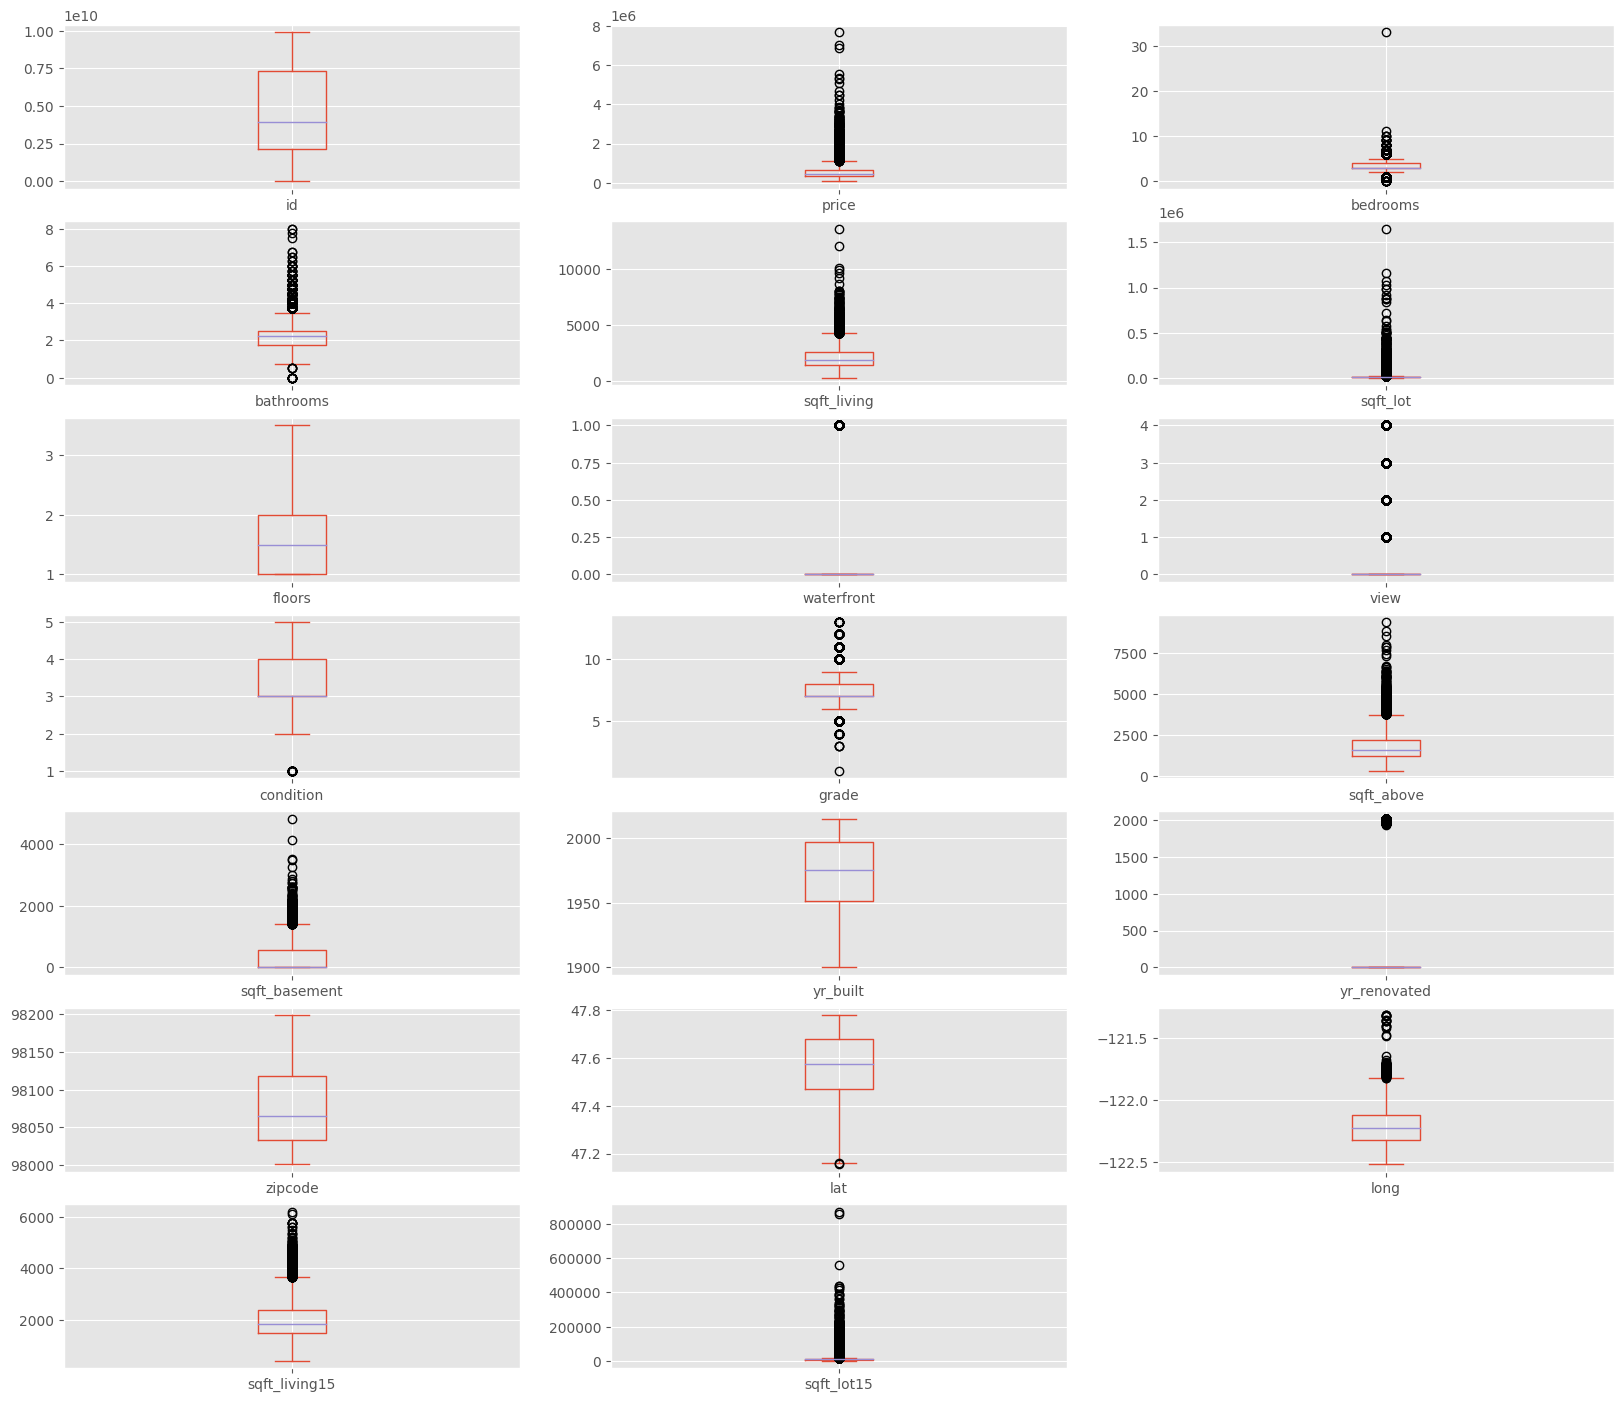

In [4]:
df.plot(kind = 'box', subplots= True , layout = (8,3), figsize = (20,20))
plt.show()

Outliers_ traitement \
bedrooms max

delete waterfront / view / lat / long/ zipcode /yr_build / yr_renovated

In [5]:
df.loc[df['bedrooms']==33, 'bedrooms']= df['bedrooms'].mean()

In [6]:
def remove_outlier (df, column):
  q1= df[column].quantile(0.25)
  q2=df[column].quantile(0.75)

  iqr = q2-q1
  lower=q1 - 1.5*iqr
  upper=q2 - 1.5*iqr

  no_outlier= df[(df[column] >= lower) & (df[column]<= upper)]
  return no_outlier

In [7]:
lot =remove_outlier(df, 'sqft_lot')

In [8]:
lot

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
27,3303700376,20141201T000000,667000.0,3.0,1.00,1400,1581,1.5,0,0,5,8,1400,0,1909,0,98112,47.6221,-122.314,1860,3861
31,2426039314,20141201T000000,280000.0,2.0,1.50,1190,1265,3.0,0,0,3,7,1190,0,2005,0,98133,47.7274,-122.357,1390,1756
63,9528102996,20141207T000000,549000.0,3.0,1.75,1540,1044,3.0,0,0,3,8,1540,0,2014,0,98115,47.6765,-122.320,1580,3090
88,1332700270,20140519T000000,215000.0,2.0,2.25,1610,2040,2.0,0,0,4,7,1610,0,1979,0,98056,47.5180,-122.194,1950,2025
89,3869900162,20140904T000000,335000.0,2.0,1.75,1030,1066,2.0,0,0,3,7,765,265,2006,0,98136,47.5394,-122.387,1030,1106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21604,9834201367,20150126T000000,429000.0,3.0,2.00,1490,1126,3.0,0,0,3,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230
21607,2997800021,20150219T000000,475000.0,3.0,2.50,1310,1294,2.0,0,0,3,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265
21608,263000018,20140521T000000,360000.0,3.0,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21610,1523300141,20140623T000000,402101.0,2.0,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007


In [10]:
df[df.duplicated(subset= 'id')]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
94,6021501535,20141223T000000,700000.0,3.0,1.50,1580,5000,1.0,0,0,3,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500
314,4139480200,20141209T000000,1400000.0,4.0,3.25,4290,12103,1.0,0,3,3,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244
325,7520000520,20150311T000000,240500.0,2.0,1.00,1240,12092,1.0,0,0,3,6,960,280,1922,1984,98146,47.4957,-122.352,1820,7460
346,3969300030,20141229T000000,239900.0,4.0,1.00,1000,7134,1.0,0,0,3,6,1000,0,1943,0,98178,47.4897,-122.240,1020,7138
372,2231500030,20150324T000000,530000.0,4.0,2.25,2180,10754,1.0,0,0,5,7,1100,1080,1954,0,98133,47.7711,-122.341,1810,6929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20181,7853400250,20150219T000000,645000.0,4.0,3.50,2910,5260,2.0,0,0,3,9,2910,0,2012,0,98065,47.5168,-121.883,2910,5260
20613,2724049222,20141201T000000,220000.0,2.0,2.50,1000,1092,2.0,0,0,3,7,990,10,2004,0,98118,47.5419,-122.271,1330,1466
20670,8564860270,20150330T000000,502000.0,4.0,2.50,2680,5539,2.0,0,0,3,8,2680,0,2013,0,98045,47.4759,-121.734,2680,5992
20780,6300000226,20150504T000000,380000.0,4.0,1.00,1200,2171,1.5,0,0,3,7,1200,0,1933,0,98133,47.7076,-122.342,1130,1598


In [11]:
df_merge = df.groupby('id')['price'].mean().reset_index()
df_merge= df_merge.rename(columns= {'price':'price_new'})
df= df.merge(df_merge, on = 'id')
df.drop('price', axis = 1 , inplace= True)
df = df.rename(columns= {'price_new' : 'price'})

In [12]:
df= df.drop_duplicates(subset='id')

In [13]:
df['date']= pd.to_datetime(df['date'])

<Axes: xlabel='date'>

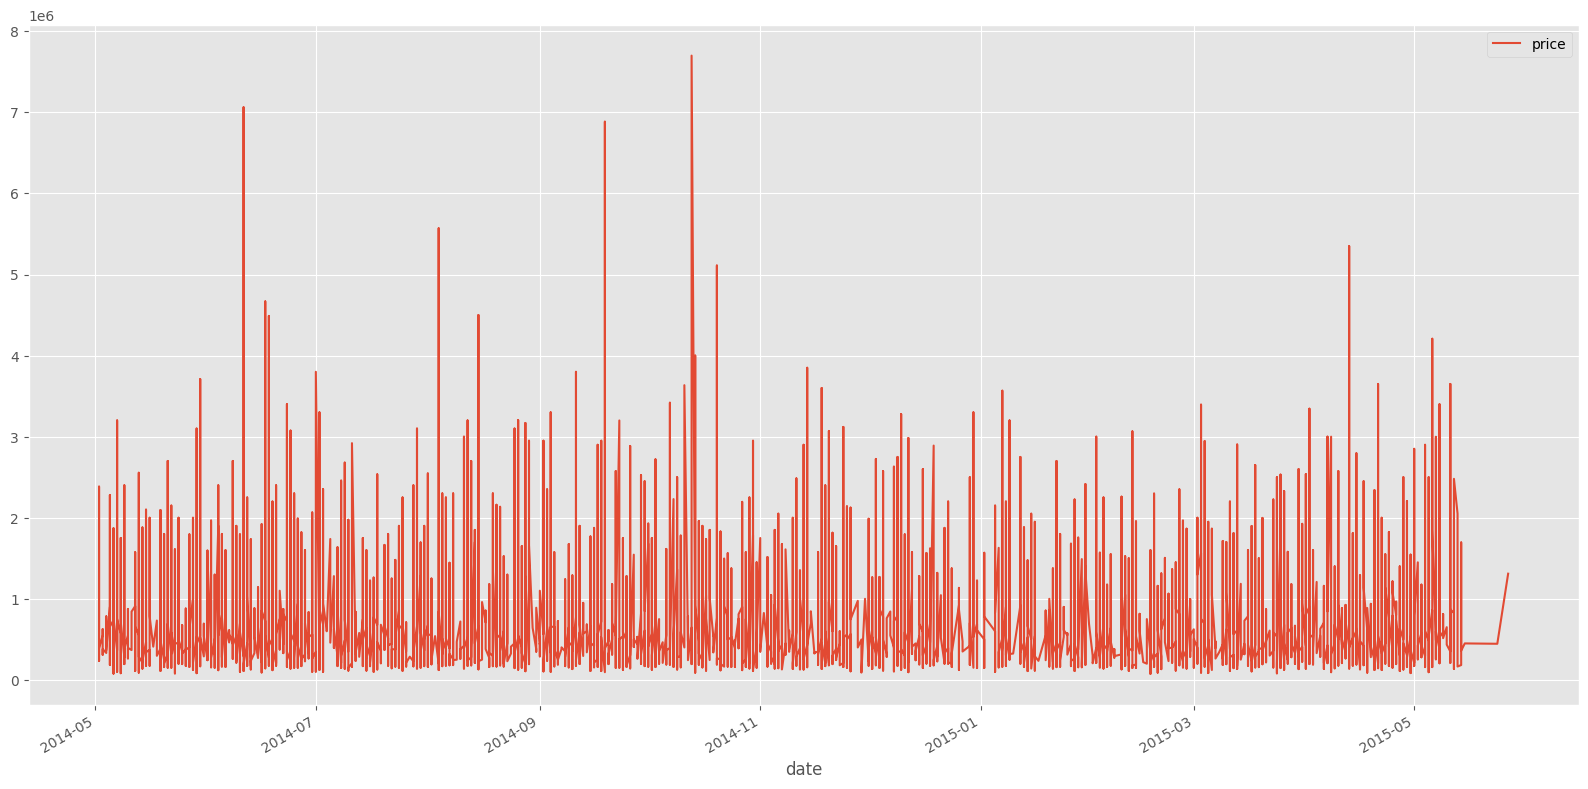

In [14]:
df.plot('date', 'price', figsize = (20,10))

In [15]:
df['year']= df['date'].dt.year
df['month']= df['date'].dt.month

<Axes: xlabel='month', ylabel='price'>

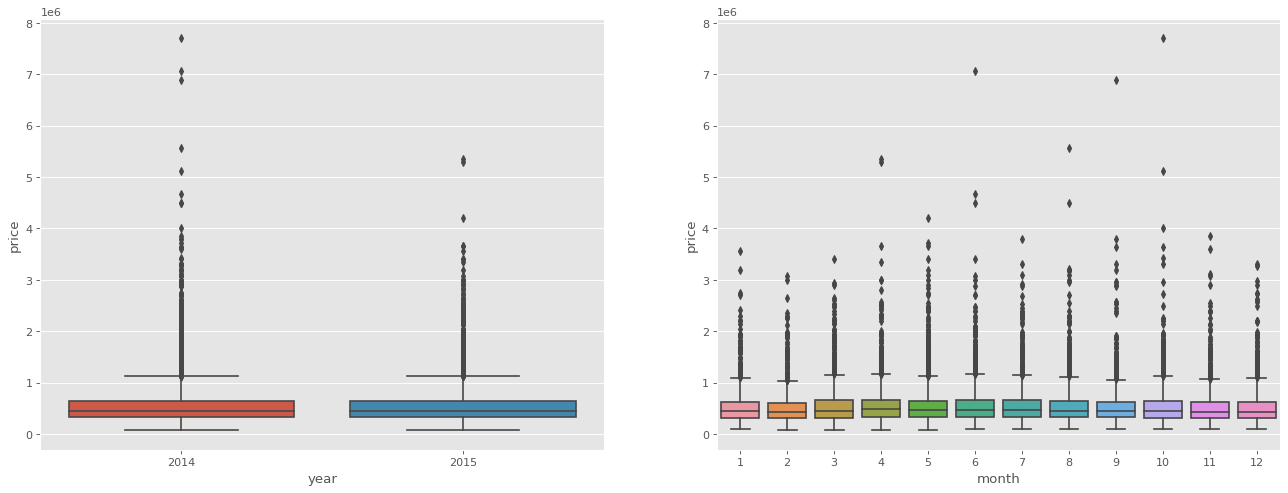

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi=80)
sns.boxplot(x='year', y='price', data=df, ax=axes[0])
sns.boxplot(x='month', y='price', data=df)

In [17]:
df

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,year,month
0,7129300520,2014-10-13,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900.0,2014,10
1,6414100192,2014-12-09,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000.0,2014,12
2,5631500400,2015-02-25,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000.0,2015,2
3,2487200875,2014-12-09,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000.0,2014,12
4,1954400510,2015-02-18,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000.0,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,3.0,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000.0,2014,5
21609,6600060120,2015-02-23,4.0,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000.0,2015,2
21610,1523300141,2014-06-23,2.0,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101.0,2014,6
21611,291310100,2015-01-16,3.0,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000.0,2015,1


In [18]:
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'sqft_living15',
       'sqft_lot15']]

y = df['price']

In [19]:
'''from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0,1))
X1 = scaler.fit_transform(X)
X1 = pd.DataFrame(X1, columns = X.columns)'''

'from sklearn.preprocessing import MinMaxScaler\nscaler = MinMaxScaler(feature_range= (0,1))\nX1 = scaler.fit_transform(X)\nX1 = pd.DataFrame(X1, columns = X.columns)'

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *
x_train, x_test, y_train, y_test= train_test_split(X, y , test_size = 0.2, random_state= 42)
model =LinearRegression()
model.fit(x_train, y_train)
y_pred= model.predict(x_test)

In [21]:
r2 = r2_score(y_test, y_pred)
r2

0.5469473976277355

In [22]:
mae = mean_absolute_error(y_test, y_pred)
mae

156918.01116482387

In [28]:
multi_linear_model = LinearRegression()
multi_linear_model.fit(x_train, y_train)

multi_linear_predictions = multi_linear_model.predict(x_test)
multi_linear_mse = mean_squared_error(y_test, multi_linear_predictions)
multi_linear_rmse = np.sqrt(multi_linear_mse)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(mae)
print(r2)
print(multi_linear_mse)
print(multi_linear_rmse)



156918.01116482387
0.5469473976277355
53538660489.65088
231384.22696815545
